In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from chart_studio.plotly import plot, iplot
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly
import chart_studio
chart_studio.tools.set_credentials_file(username='bashman18', api_key='••••••••••')
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 100)
df = pd.read_csv(r'C:\Users\BASH\Documents\python class\Data Visualization with python and plotly\house-prices-advanced-regression-techniques\train.csv')
df.drop('Id', axis=1, inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [9]:
table_cat = ff.create_table(df.describe(include=['O']).T, index=True, index_title='Categorical columns')
iplot(table_cat)

In [10]:
df['SalePrice'].iplot(
    kind='hist',
    bins=100,
    xTitle='price',
    linecolor='black',
    yTitle='count',
    title='Histogram of Sale Price')

In [11]:
df['SalePrice'].iplot(kind='box', title='Box plot of SalePrice')

In [13]:
trace0 = go.Box(
    y=df.loc[df['CentralAir'] == 'Y']['SalePrice'],
    name = 'With air conditioning',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=df.loc[df['CentralAir'] == 'N']['SalePrice'],
    name = 'no air conditioning',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
data = [trace0, trace1]
layout = go.Layout(
    title = "Boxplot of Sale Price by air conditioning"
)

fig = go.Figure(data=data,layout=layout).iplot(fig)

In [15]:
trace0 = go.Histogram(
    x=df.loc[df['CentralAir'] == 'Y']['SalePrice'], name='With Central air conditioning',
    opacity=0.75
)
trace1 = go.Histogram(
    x=df.loc[df['CentralAir'] == 'N']['SalePrice'], name='No Central air conditioning',
    opacity=0.75
)

data = [trace0, trace1]
layout = go.Layout(barmode='overlay', title='Histogram of House Sale Price for both with and with no Central air conditioning')
fig = go.Figure(data=data, layout=layout).iplot(fig)

In [16]:
df.groupby('CentralAir')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
CentralAir,,,,,,,,
N,95.0,105264.073684,40671.273961,34900.0,82000.0,98000.0,128500.0,265979.0
Y,1365.0,186186.709890,78805.206820,52000.0,134800.0,168000.0,219210.0,755000.0


In [17]:
trace0 = go.Box(
    y=df.loc[df['GarageCars'] == 0]['SalePrice'],
    name = 'no garage',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=df.loc[df['GarageCars'] == 1]['SalePrice'],
    name = '1-car garage',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=df.loc[df['GarageCars'] == 2]['SalePrice'],
    name = '2-cars garage',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace3 = go.Box(
    y=df.loc[df['GarageCars'] == 3]['SalePrice'],
    name = '3-cars garage',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace4 = go.Box(
    y=df.loc[df['GarageCars'] == 4]['SalePrice'],
    name = '4-cars garage',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "Boxplot of Sale Price by garage size"
)

fig = go.Figure(data=data,layout=layout).iplot(fig)

In [18]:
df.loc[df['GarageCars'] == 0]['SalePrice'].iplot(
    kind='hist',
    bins=50,
    xTitle='price',
    linecolor='black',
    yTitle='count',
    title='Histogram of Sale Price of houses with no garage')

In [19]:
df.loc[df['GarageCars'] == 1]['SalePrice'].iplot(
    kind='hist',
    bins=50,
    xTitle='price',
    linecolor='black',
    yTitle='count',
    title='Histogram of Sale Price of houses with 1-car garage')

In [20]:
df.loc[df['GarageCars'] == 2]['SalePrice'].iplot(
    kind='hist',
    bins=100,
    xTitle='price',
    linecolor='black',
    yTitle='count',
    title='Histogram of Sale Price of houses with 2-car garage')

In [21]:
df.loc[df['GarageCars'] == 3]['SalePrice'].iplot(
    kind='hist',
    bins=50,
    xTitle='price',
    linecolor='black',
    yTitle='count',
    title='Histogram of Sale Price of houses with 3-car garage')

In [22]:
df.loc[df['GarageCars'] == 4]['SalePrice'].iplot(
    kind='hist',
    bins=10,
    xTitle='price',
    linecolor='black',
    yTitle='count',
    title='Histogram of Sale Price of houses with 4-car garage')

In [23]:
x = df.OverallQual.value_counts()
x/x.sum()

5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64

In [24]:
x = df.GarageCars.value_counts()
x/x.sum()

2    0.564384
1    0.252740
3    0.123973
0    0.055479
4    0.003425
Name: GarageCars, dtype: float64

In [25]:
x = df.CentralAir.value_counts()
x/x.sum()

Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64

In [26]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [27]:
print("The mean of sale price, - Pandas method: ", df.SalePrice.mean())
print("The mean of sale price, - Numpy function: ", np.mean(df.SalePrice))
print("The median sale price: ", df.SalePrice.median())
print("50th percentile, same as the median: ", np.percentile(df.SalePrice, 50))
print("75th percentile: ", np.percentile(df.SalePrice, 75))
print("Pandas method for quantiles, equivalent to 75th percentile: ", df.SalePrice.quantile(0.75))

The mean of sale price, - Pandas method:  180921.19589041095
The mean of sale price, - Numpy function:  180921.19589041095
The median sale price:  163000.0
50th percentile, same as the median:  163000.0
75th percentile:  214000.0
Pandas method for quantiles, equivalent to 75th percentile:  214000.0


In [28]:
print('The proportion of the houses with prices between 25th percentile and 75th percentile: ', np.mean((df.SalePrice >= 129975) & (df.SalePrice <= 214000)))

The proportion of the houses with prices between 25th percentile and 75th percentile:  0.5020547945205479


In [29]:
print('The proportion of house with total square feet of basement area between 25th percentile and 75th percentile: ', np.mean((df.TotalBsmtSF >= 795.75) & (df.TotalBsmtSF <= 1298.25)))

The proportion of house with total square feet of basement area between 25th percentile and 75th percentile:  0.5


In [30]:
a = (df.SalePrice >= 129975) & (df.SalePrice <= 214000)
b = (df.TotalBsmtSF >= 795.75) & (df.TotalBsmtSF <= 1298.25)
print(np.mean(a | b))

0.7143835616438357


In [31]:
q75, q25 = np.percentile(df.loc[df['CentralAir']=='N']['SalePrice'], [75,25])
iqr = q75 - q25
print('Sale price IQR for houses with no air conditioning: ', iqr)

Sale price IQR for houses with no air conditioning:  46500.0


In [32]:
q75, q25 = np.percentile(df.loc[df['CentralAir']=='Y']['SalePrice'], [75,25])
iqr = q75 - q25
print('Sale price IQR for houses with air conditioning: ', iqr)

Sale price IQR for houses with air conditioning:  84410.0


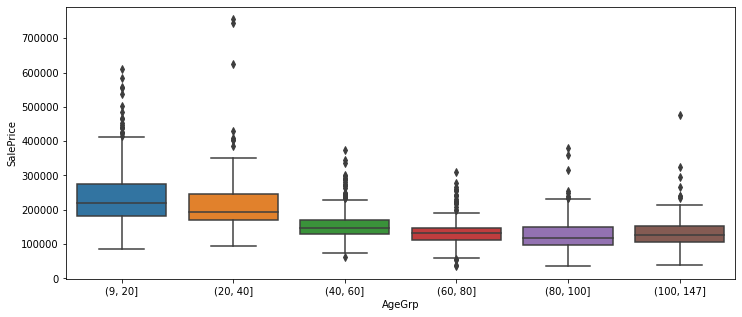

In [33]:
df['HouseAge'] = 2019 - df['YearBuilt']
df["AgeGrp"] = pd.cut(df.HouseAge, [9, 20, 40, 60, 80, 100, 147]) # Create age strata based on these cut points
plt.figure(figsize=(12, 5)) 
sns.boxplot(x="AgeGrp", y="SalePrice", data=df);

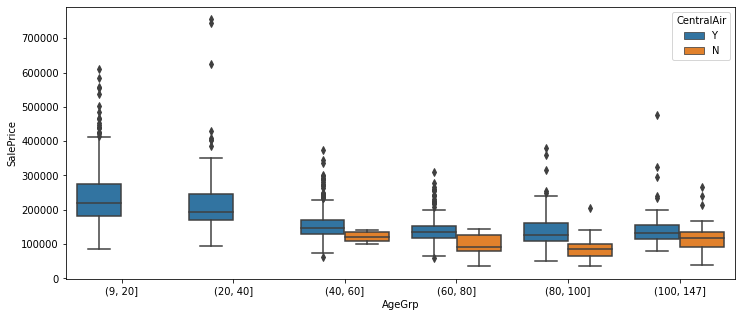

In [34]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="AgeGrp", y="SalePrice", hue="CentralAir", data=df)
plt.show();

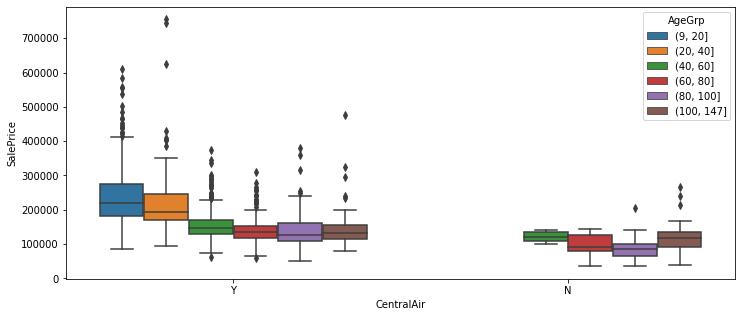

In [35]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="CentralAir", y="SalePrice", hue="AgeGrp", data=df)
plt.show();

In [36]:
df1 = df.groupby(["AgeGrp", "CentralAir"])["BldgType"]
df1 = df1.value_counts()
df1 = df1.unstack()
df1 = df1.apply(lambda x: x/x.sum(), axis=1)
print(df1.to_string(float_format="%.3f"))

BldgType               1Fam  2fmCon  Duplex  Twnhs  TwnhsE
AgeGrp     CentralAir                                     
(9, 20]    Y          0.782     NaN     NaN  0.046   0.172
(20, 40]   Y          0.827     NaN   0.053  0.010   0.111
(40, 60]   N          0.167   0.167   0.667    NaN     NaN
           Y          0.813   0.008   0.067  0.059   0.053
(60, 80]   N          0.556   0.148   0.296    NaN     NaN
           Y          0.955   0.030   0.015    NaN     NaN
(80, 100]  N          0.926   0.074     NaN    NaN     NaN
           Y          0.992   0.008     NaN    NaN     NaN
(100, 147] N          0.771   0.229     NaN    NaN     NaN
           Y          0.860   0.120   0.020    NaN     NaN


In [37]:
df.iplot(
    x='GrLivArea',
    y='SalePrice',
    xTitle='Above ground living area square feet',
    yTitle='Sale price',
    mode='markers',
    title='Sale Price vs Above ground living area square feet')

In [38]:
trace1 = go.Scatter(
    x=df['GrLivArea'], y=df['SalePrice'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['GrLivArea'], y=df['SalePrice'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df['GrLivArea'], name='Ground Living area density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=df['SalePrice'], name='Sale Price density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout).iplot(fig)

In [44]:
trace0 = go.Scatter(x=df.loc[df['BldgType'] == '1Fam']['GrLivArea'], y=df.loc[df['BldgType'] == '1Fam']['SalePrice'], mode='markers', name='1Fam')
trace1 = go.Scatter(x=df.loc[df['BldgType'] == 'TwnhsE']['GrLivArea'], y=df.loc[df['BldgType'] == 'TwnhsE']['SalePrice'], mode='markers', name='TwnhsE')
trace2 = go.Scatter(x=df.loc[df['BldgType'] == 'Duplex']['GrLivArea'], y=df.loc[df['BldgType'] == 'Duplex']['SalePrice'], mode='markers', name='Duplex')
trace3 = go.Scatter(x=df.loc[df['BldgType'] == 'Twnhs']['GrLivArea'], y=df.loc[df['BldgType'] == 'Twnhs']['SalePrice'], mode='markers', name='Twnhs')
trace4 = go.Scatter(x=df.loc[df['BldgType'] == '2fmCon']['GrLivArea'], y=df.loc[df['BldgType'] == '2fmCon']['SalePrice'], mode='markers', name='2fmCon')

fig = tools.make_subplots(rows=2, cols=3)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout'].update(height=400, width=800, title='Sale price Vs. Above ground living area square feet' +
                                                  ' by building type').iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



AttributeError: 'Layout' object has no attribute 'iplot'

In [45]:
print(df.loc[df.BldgType=="1Fam", ["GrLivArea", "SalePrice"]].corr())
print(df.loc[df.BldgType=="TwnhsE", ["GrLivArea", "SalePrice"]].corr())
print(df.loc[df.BldgType=='Duplex', ["GrLivArea", "SalePrice"]].corr())
print(df.loc[df.BldgType=="Twnhs", ["GrLivArea", "SalePrice"]].corr())
print(df.loc[df.BldgType=="2fmCon", ["GrLivArea", "SalePrice"]].corr())

           GrLivArea  SalePrice
GrLivArea   1.000000   0.738956
SalePrice   0.738956   1.000000
           GrLivArea  SalePrice
GrLivArea   1.000000   0.641622
SalePrice   0.641622   1.000000
           GrLivArea  SalePrice
GrLivArea   1.000000   0.490441
SalePrice   0.490441   1.000000
           GrLivArea  SalePrice
GrLivArea    1.00000    0.66924
SalePrice    0.66924    1.00000
           GrLivArea  SalePrice
GrLivArea   1.000000   0.498502
SalePrice   0.498502   1.000000


In [46]:
x = pd.crosstab(df.MSZoning, df.BldgType)
x

BldgType,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
MSZoning,,,,,
C (all),9,1,0,0,0
FV,38,0,0,9,18
RH,9,2,3,0,2
RL,1025,16,43,10,57
RM,139,12,6,24,37


In [47]:
x.apply(lambda z: z/z.sum(), axis=1)

BldgType,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
MSZoning,,,,,
C (all),0.900000,0.100000,0.000000,0.000000,0.000000
FV,0.584615,0.000000,0.000000,0.138462,0.276923
RH,0.562500,0.125000,0.187500,0.000000,0.125000
RL,0.890530,0.013901,0.037359,0.008688,0.049522
RM,0.637615,0.055046,0.027523,0.110092,0.169725


In [48]:
x.apply(lambda z: z/z.sum(), axis=0)

BldgType,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
MSZoning,,,,,
C (all),0.007377,0.032258,0.000000,0.000000,0.000000
FV,0.031148,0.000000,0.000000,0.209302,0.157895
RH,0.007377,0.064516,0.057692,0.000000,0.017544
RL,0.840164,0.516129,0.826923,0.232558,0.500000
RM,0.113934,0.387097,0.115385,0.558140,0.324561


In [49]:
df.groupby(["CentralAir", "BldgType", "MSZoning"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

MSZoning              C (all)        FV        RH        RL        RM
CentralAir BldgType                                                  
N          1Fam      0.073529  0.000000  0.058824  0.426471  0.441176
           2fmCon    0.066667  0.000000  0.000000  0.466667  0.466667
           Duplex    0.000000  0.000000  0.166667  0.750000  0.083333
Y          1Fam      0.003472  0.032986  0.004340  0.864583  0.094618
           2fmCon    0.000000  0.000000  0.125000  0.562500  0.312500
           Duplex    0.000000  0.000000  0.025000  0.850000  0.125000
           Twnhs     0.000000  0.209302  0.000000  0.232558  0.558140
           TwnhsE    0.000000  0.157895  0.017544  0.500000  0.324561

In [56]:
data = []
for i in range(0,len(pd.unique(df['BldgType']))):
    trace = {
            "type": 'violin',
            "x": df['BldgType'][df['BldgType'] == pd.unique(df['BldgType'])[i]],
            "y": df['SalePrice'][df['BldgType'] == pd.unique(df['BldgType'])[i]],
            "name": pd.unique(df['BldgType'])[i],
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            }
        }
    data.append(trace)

        
fig = {
    "data": data,
    "layout" : {
        "title": "",
        "yaxis": {
            "zeroline": False,} }}

iplot(fig)